In [18]:
import process_data
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np 
import matplotlib.pyplot as plt

# Prepare dataset 
features = ['Slide', 'CoreId', 'DNA1', 'CD11c', 'CD207', 'GranzymeB', 'CD163', 'CD57', 'CD20', 'CD4', 'CD3d', 'CD8a', 'CD45RO', 'FOXP3', 'PD1', 'pTBK1', 'CD68', 'PDL1_2', 'CD15', 'CD11b', 'yH2AX', 'cPARP1', 'PDL1_488', 'PDL1_555', 'Ki67','Vimentin', 'MHCII', 'CK7', 'MHCI', 'ECadherin', 'aSMA', 'CD31', 'Area', 'Eccentricity', 'Roundness']
skewed_features = ['CD11c', 'CD207', 'GranzymeB', 'CD163', 'CD57', 'CD20', 'CD4', 'CD3d', 'CD8a', 'CD45RO', 'FOXP3', 'PD1', 'pTBK1', 'CD68', 'PDL1_2', 'CD15', 'CD11b', 'yH2AX', 'cPARP1', 'PDL1_488', 'PDL1_555', 'Ki67','Vimentin', 'MHCII', 'ECadherin', 'aSMA']

df = process_data.prep_df("T-CycIF.csv", "Cancer_cells.csv", features, "All-slides_cycif2samples.txt")

print(f"Shape of initial dataset: {df.shape}")
markers = ['DNA1', 'CD11c', 'CD207', 'GranzymeB', 'CD163', 'CD57', 'CD20', 'CD4', 'CD3d', 'CD8a', 'CD45RO', 'FOXP3', 'PD1', 'pTBK1', 'CD68', 'PDL1_2', 'CD15', 'CD11b', 'yH2AX', 'cPARP1', 'PDL1_488', 'PDL1_555', 'Ki67','Vimentin', 'MHCII', 'CK7', 'MHCI', 'ECadherin', 'aSMA', 'CD31']
features = ['DNA1', 'CD11c', 'CD207', 'GranzymeB', 'CD163', 'CD57', 'CD20', 'CD4', 'CD3d', 'CD8a', 'CD45RO', 'FOXP3', 'PD1', 'pTBK1', 'CD68', 'PDL1_2', 'CD15', 'CD11b', 'yH2AX', 'cPARP1', 'PDL1_488', 'PDL1_555', 'Ki67','Vimentin', 'MHCII', 'CK7', 'MHCI', 'ECadherin', 'aSMA', 'CD31', 'Area', 'Eccentricity', 'Roundness']

log_df = process_data.transform_df('LOG', df, markers)

slides = log_df['cycif.slide'].unique()
    
print("SLIDE: ", slides[0])
# create a boolean mask to filter the rows
mask = log_df['cycif.slide'] == slides[0]
data = log_df.loc[mask, markers]
print("Shape: ", data.shape)

column = data.columns[3]
print("Column: ", column)

# calculate the 1st and 99th percentiles for each column
percentiles = data.apply(lambda x: np.percentile(x, [0.1, 99.9]))
print(percentiles)

m = percentiles[column].iloc[0]
n = percentiles[column].iloc[1]

print(m, n)
col_mask = (data[column] >= m) & (data[column] <= n)
print("col_mask: ",col_mask)
num_removed = col_mask.size - col_mask.sum()
print(f"Removed {num_removed} rows for column {column}")
mask &= col_mask
print("Final shape: ", mask.shape)    
    
# trim_df = process_data.remove_outliers(log_df,markers)
# print(f"Shape of trimmed dataset: {trim_df.shape}")
# print(trim_df['therapy_sequence'].unique())
# print(trim_df['Molecular_profile'].unique())

# df = process_data.scaling('slide', 'Standard', trim_df, features)

# For PCA
# std_df = process_data.scaler('Standard',df,features[2:])

# # To visualise sub-groups
# df.groupby(['therapy_sequence','Molecular_profile']).head(1)

# # To check the division of values for each sub-group
# group_counts = df['daystoprogression'].value_counts()
# print(group_counts)

# df.head(5)

# df.shape

['TMA_18_810' 'TMA_31_1020' 'TMA_33_576' 'TMA_34_504' 'TMA_41_812'
 'TMA_42_961' 'TMA_43_616' 'TMA_44_810' 'TMA_45_312' 'TMA_46_325']
Shape of initial dataset: (1561712, 41)
SLIDE:  TMA_18_810
Shape:  (236588, 30)
Column:  GranzymeB
        DNA1     CD11c     CD207  GranzymeB     CD163      CD57      CD20  \
0   7.667006  6.112617  5.950888   7.633264  6.375789  5.238303  7.058618   
1  10.727274  8.215325  9.620451   8.727588  7.899147  7.144120  8.100417   

        CD4      CD3d      CD8a  ...  PDL1_488  PDL1_555       Ki67  Vimentin  \
0  5.771441  5.680795  7.581364  ...  5.836403  4.514340   6.303746  5.037521   
1  6.806087  7.847611  9.027901  ...  6.630496  6.043749  10.230598  9.347581   

       MHCII        CK7       MHCI  ECadherin      aSMA     CD31  
0   7.156878   4.201035   5.785002   5.900214  4.275473  6.82183  
1  10.473519  11.023533  10.616332   7.938452  9.593434  7.55420  

[2 rows x 30 columns]
7.633264106744793 8.727587862560869
col_mask:  0         True
1    

In [2]:
final_df = process_data.stratified_sampling(df,'therapy_sequence','Molecular_profile', 10)

The size of down-sampled dataframe:  (37725, 41)
Patient number:  89
Molecular profile number:  5
Therapy number:  ['NACT' 'NACT followed by re-debulking' 'Primairy debulking'
 'PDS followed by NACT']


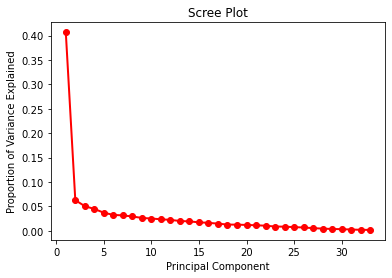

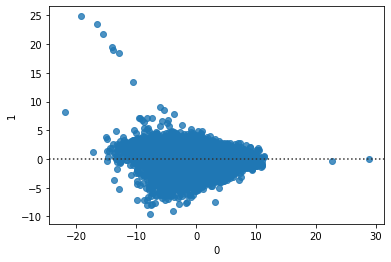

In [3]:
process_data.get_PCA(final_df,'daystoprogression')

In [4]:
label_encoder = LabelEncoder()
profile_lab = label_encoder.fit_transform((final_df['Molecular_profile'].astype('str') ).values)

integer_mapping = {l: i for i, l in enumerate(label_encoder.classes_)}
labels = list(integer_mapping.keys())

df = final_df[['DNA1', 'CD11c', 'CD207', 'GranzymeB', 'CD163', 'CD57', 'CD20', 'CD4', 'CD3d', 'CD8a', 'CD45RO', 'FOXP3', 'PD1', 'pTBK1', 'CD68', 'PDL1_2', 'CD15', 'CD11b', 'yH2AX', 'cPARP1', 'PDL1_488', 'PDL1_555', 'Ki67','Vimentin', 'MHCII', 'CK7', 'MHCI', 'ECadherin', 'aSMA', 'CD31', 'Area', 'Eccentricity', 'Roundness','patient','Molecular_profile','therapy_sequence','daystoprogression']]
df.loc[:, 'therapy_sequence'] = label_encoder.fit_transform((df['therapy_sequence'].astype('str')).values)
df.loc[:, 'Molecular_profile'] = label_encoder.fit_transform((df['Molecular_profile'].astype('str')).values)

# df.groupby('therapy_sequence').head(5)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/Users/alex/Desktop/Laboratory/Notebooks/visuals.py:48: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



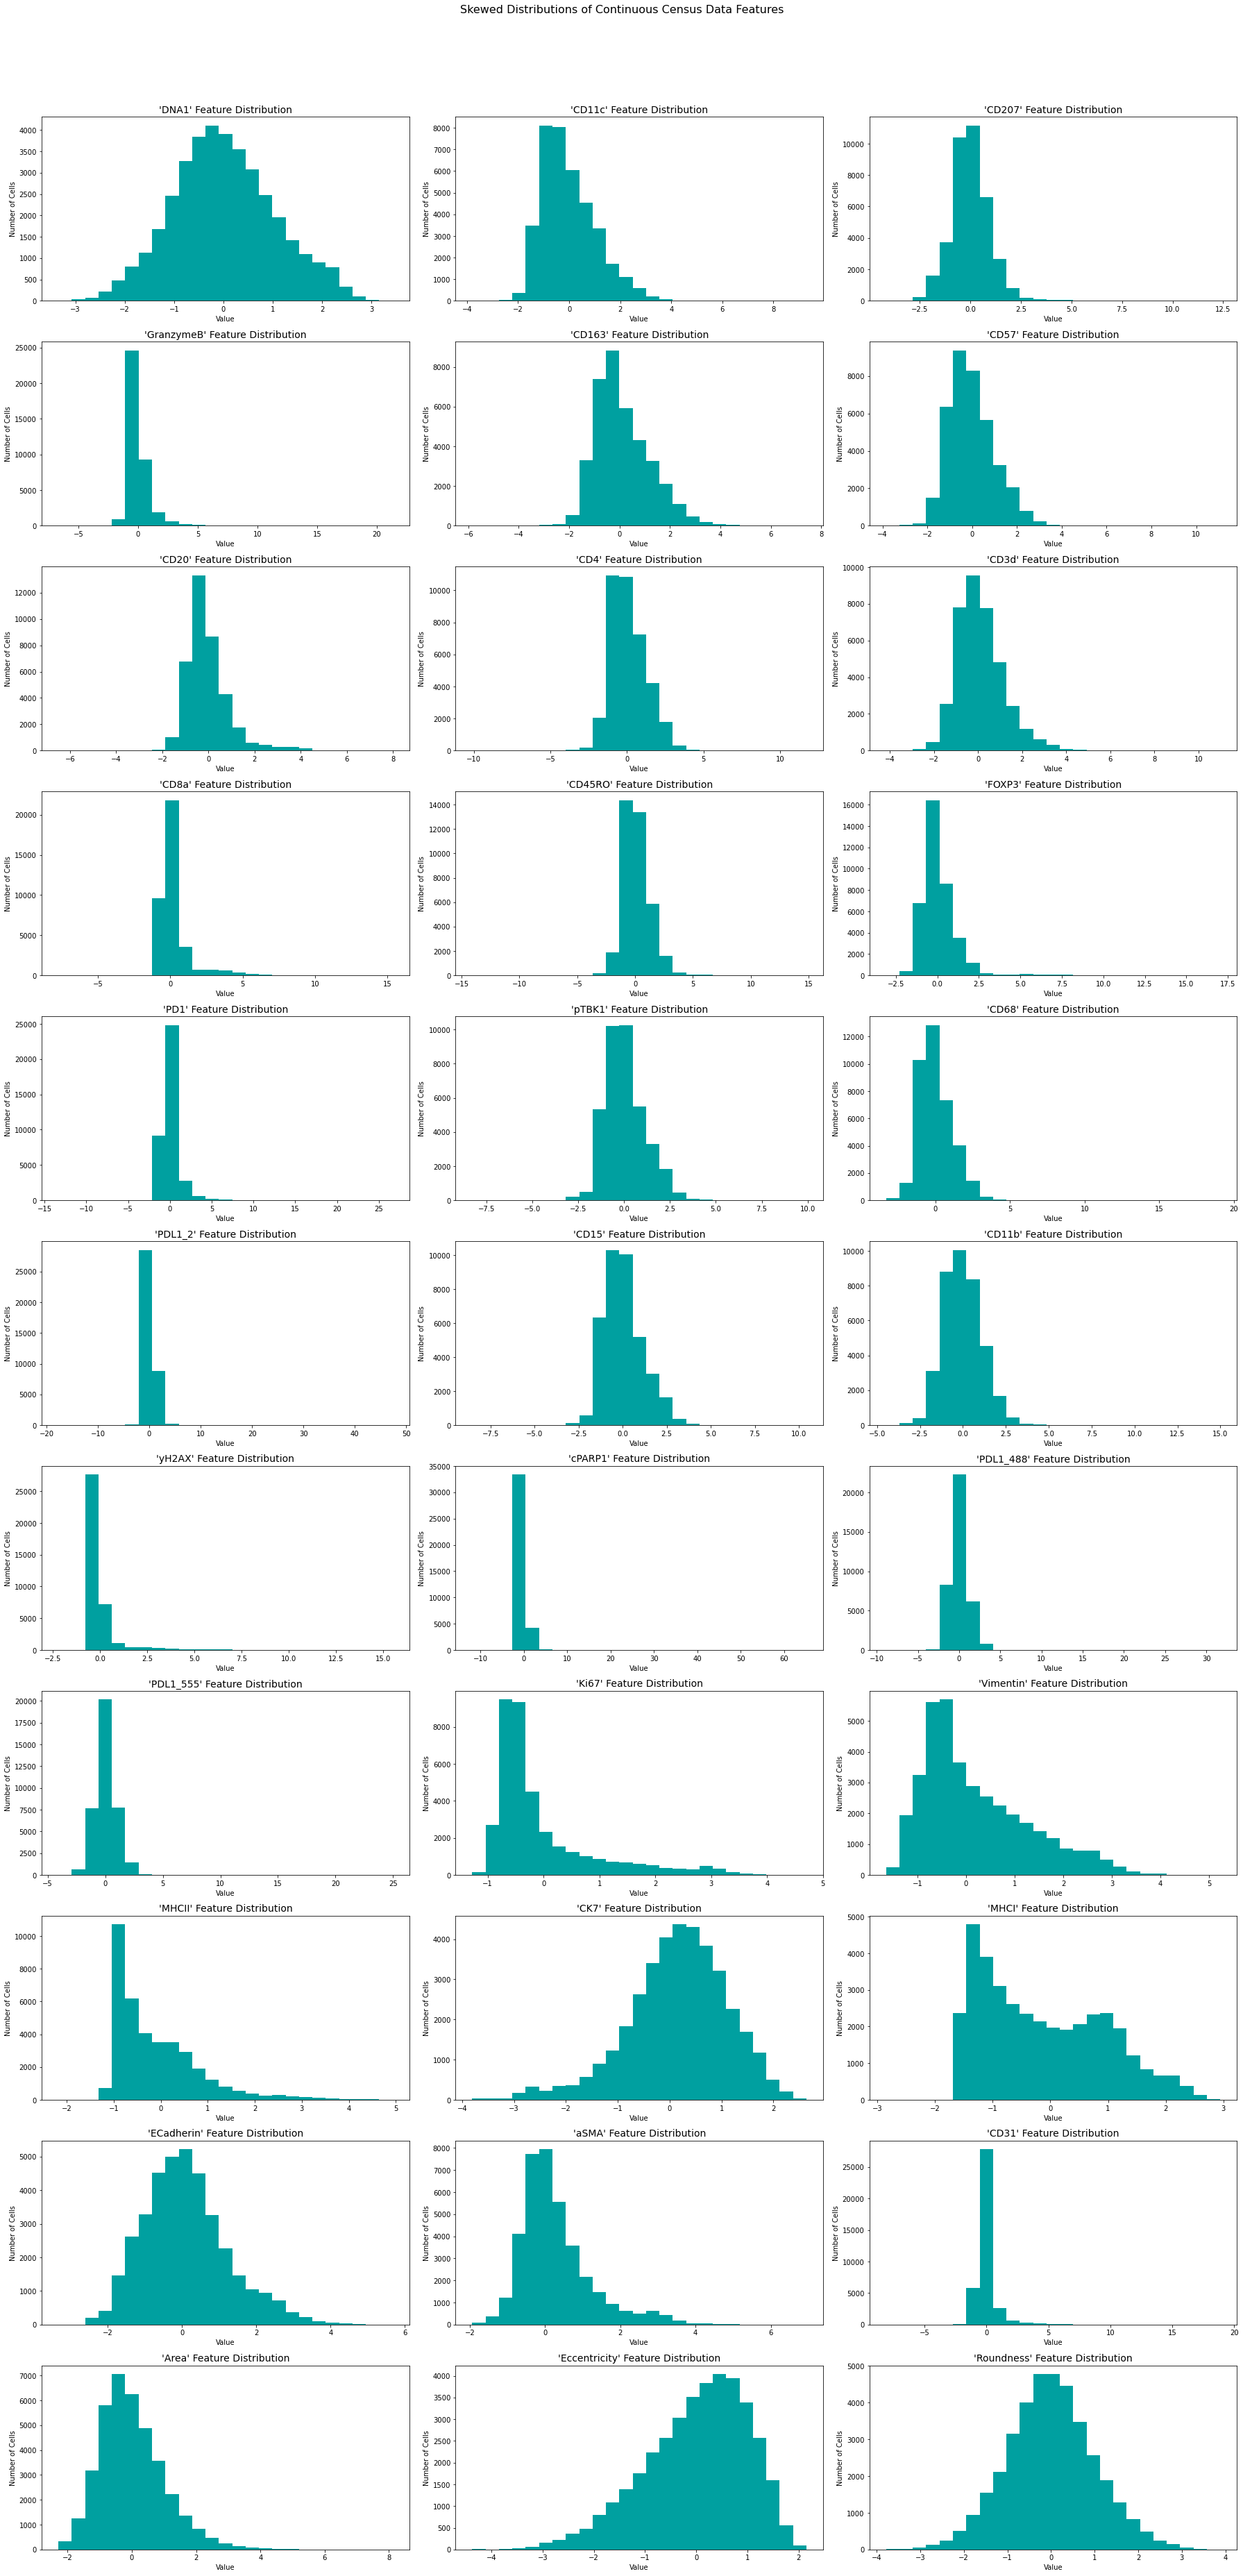

In [5]:
# Import supplementary visualization code visuals.py
import visuals as vs
vs.distribution(df)

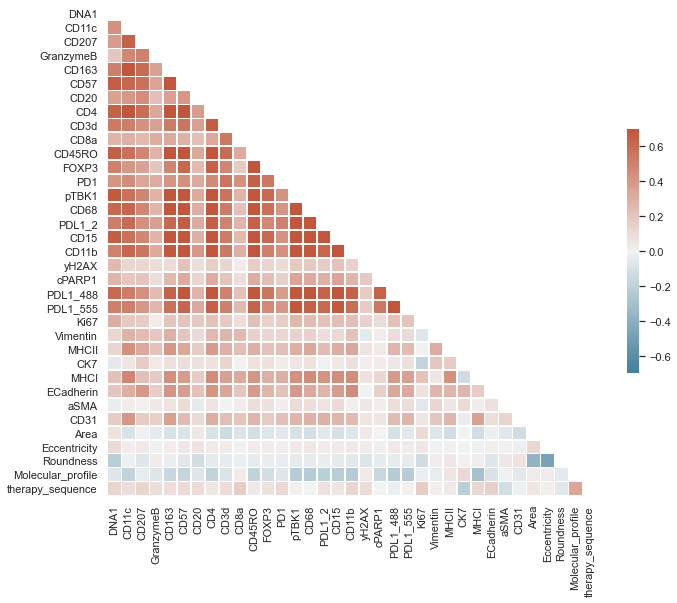

In [6]:
process_data.create_corr_matrix(df)

In [7]:
import learning 

X_train, y_train, X_test, y_test = learning.prep_train_test_data(df,'Molecular_profile', 'therapy_sequence','Molecular_profile', 5)

In [8]:
import numpy as np
unique_classes = len(np.unique(y_test))
print("Number of classes in y_train:", unique_classes)

Number of classes in y_train: 5


In [18]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    if learner.__class__.__name__ == 'AdaBoostClassifier':
        param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}
        clf = GridSearchCV(learner, param_grid, scoring='f1_macro', n_jobs=-1, cv=5)
    elif learner.__class__.__name__ == 'RandomForestClassifier':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 50, 100]}
        clf = GridSearchCV(learner, param_grid, scoring='f1_macro', n_jobs=-1, cv=5)
    elif learner.__class__.__name__ == 'DecisionTreeClassifier':
        param_grid = {'max_depth': [10, 50, 100]}
        clf = GridSearchCV(learner, param_grid, scoring='f1_macro', n_jobs=-1, cv=5)
    clf.fit(X_train[:sample_size], y_train[:sample_size])
    learner = clf.best_estimator_
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5, average='macro')
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5, average='macro')
    
    # Compute cross-validation scores on the full training set
    cv_scores = cross_val_score(learner, X_train, y_train, cv=5)
    results['cv_scores'] = cv_scores
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

AdaBoostClassifier trained on 228 samples.
AdaBoostClassifier trained on 2283 samples.
AdaBoostClassifier trained on 22831 samples.
RandomForestClassifier trained on 228 samples.
RandomForestClassifier trained on 2283 samples.
RandomForestClassifier trained on 22831 samples.
DecisionTreeClassifier trained on 228 samples.
DecisionTreeClassifier trained on 2283 samples.
DecisionTreeClassifier trained on 22831 samples.


/Users/alex/Desktop/Laboratory/Notebooks/visuals.py:118: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



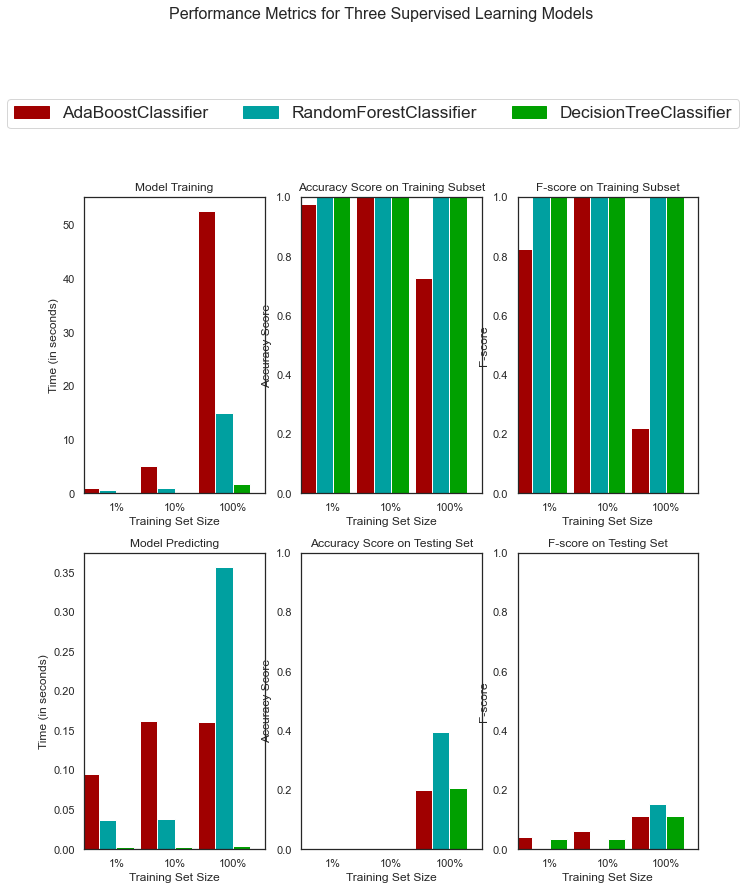

In [19]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
# import xgboost as xgb
# from xgboost import XGBClassifier
from sklearn import tree
import visuals as vs
from time import time
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state = 10)
clf_B = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clf_C = tree.DecisionTreeClassifier(random_state = 10)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
#         if clf == clf_C:
#             plt.figure(dpi=100)
#             tree.plot_tree(clf, filled=True, feature_names = df.columns)
#             plt.show()

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results)

In [ ]:
# TODO: Train the supervised model on the training set using .fit(X_train, y_train)

for clf in [clf_A, clf_B, clf_C]:
    model = clf.fit(X_train, y_train)

    # TODO: Extract the feature importances using .feature_importances_ 
    importances = model.feature_importances_

    # Plot
    vs.feature_plot(importances, X_train, y_train)